In [1]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from IPython.display import display 
from sklearn.metrics import recall_score, make_scorer
import model_utils 
from sklearn.externals import joblib
import shap
# Pretty display for notebooks
%matplotlib inline
#pd.set_option('display.max_colwidth', -1)

dataset, features, labels = model_utils.getDataSet("datasets/dataset_validation.csv")

,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PATOLOGIA_TIPO,PET_COD_DEPTO,PET_MPIO,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_TIPOATENCION,PQR_TIPOPETICION,TRIM,RIESGO_VIDA
0,0.347848,0.401902,4.364364e-01,0.33984,6.256256e-01,0.793293,0.379880,5.950951e-01,0.45045,1.0,...,0.487988,0.744244,0.828829,1.000000,0.242242,9.999999e-01,0.222222,5.915916e-01,0.638138,0
1,0.230731,1.000000,9.704705e-01,0.33984,6.256256e-01,0.242242,0.379880,5.950951e-01,0.45045,1.0,...,0.487988,0.150150,0.237738,1.000000,0.625626,9.999999e-01,1.000000,5.915916e-01,0.357357,0
2,0.129630,0.401902,1.000000e-07,1.00000,1.000000e-07,0.214214,0.379880,1.000000e-07,0.45045,1.0,...,0.273774,0.038038,0.181181,1.000000,0.242242,9.999999e-01,0.222222,5.915916e-01,0.357357,0
3,0.848599,1.000000,4.364364e-01,0.33984,6.256256e-01,0.789289,0.379880,5.950951e-01,0.45045,1.0,...,0.487988,0.744244,0.828829,1.000000,0.242242,1.000000e-07,0.222222,1.000000e-07,0.638138,0
4,0.793794,0.148649,1.000000e-07,0.33984,1.000000e-07,0.299800,0.785786,9.919920e-01,1.00000,1.0,...,0.959960,0.860861,0.247247,0.023023,0.038539,9.999999e-01,0.017017,5.915916e-01,1.000000,0


# Validation for models trained with full dataset

### RandomForestClassifier

F-score on validation data: 0.7923
tn: 51308.000000, fp: 5283.000000, fn:2433.000000, tp: 11458.000000


AssertionError: The shap_values arg looks looks multi output, try shap_values[i].

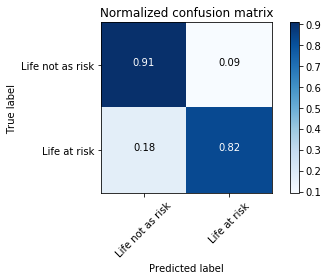

In [10]:
rfClassifier = model_utils.modelValidation('rfClassifier.joblib', features, labels)

rfcExplainer = shap.TreeExplainer(rfClassifier)
rfValues = rfcExplainer.shap_values(features)
shap.force_plot(rfValues[0, :], features.iloc[0,:])

In [52]:
print(np.asarray(rfValues)[0,:])
shap.force_plot(rfcExplainer.expected_value[0], np.asarray(rfValues)[0,:], features.iloc[0,:])

[[ 6.80085229e-04  4.01294557e-04 -6.59815422e-03 ...  2.59442052e-03
  -3.94778682e-05 -3.94109038e-05]
 [ 1.79174718e-04 -3.52408480e-04  6.05771873e-03 ... -2.75531189e-04
  -1.11103461e-04 -1.06635499e-04]
 [ 1.20219532e-04  2.68706026e-04 -1.09764458e-02 ...  1.00137421e-03
  -1.12582652e-04 -1.81522018e-04]
 ...
 [ 1.75905520e-05 -4.55388467e-05  4.34113958e-03 ... -7.56780573e-04
  -2.32109564e-05 -4.25092931e-04]
 [-7.87840345e-05  1.57356892e-05  1.60796932e-03 ... -2.66169287e-04
  -4.41911633e-05 -2.58135246e-05]
 [ 8.79807848e-05  5.16765967e-04 -5.21218700e-03 ... -1.93020938e-04
   1.55159069e-03 -9.91566833e-05]]


IndexError: too many indices for array

### AdaBoostClassifier

F-score on validation data: 0.7923
tn: 51308.000000, fp: 5283.000000, fn:2433.000000, tp: 11458.000000


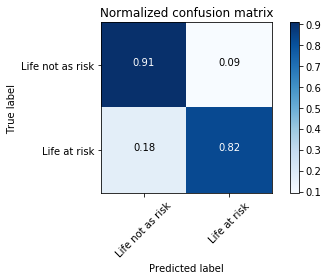

In [3]:
model_utils.modelValidation('adaClassifier.joblib', features, labels)

### Stacking with two best classifiers

F-score on validation data: 0.7231
tn: 54684.000000, fp: 1907.000000, fn:4175.000000, tp: 9716.000000


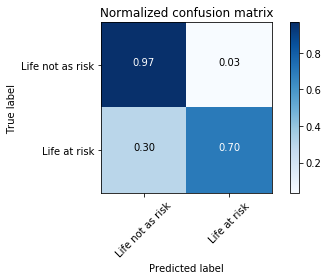

In [4]:
model_utils.modelValidation('sclf.joblib', features, labels)

### Stacking with all classifiers

F-score on validation data: 0.7216
tn: 54649.000000, fp: 1942.000000, fn:4192.000000, tp: 9699.000000


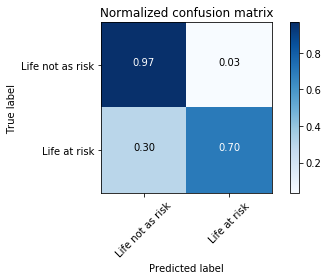

In [5]:
model_utils.modelValidation('sclf2.joblib', features, labels)

### RandomOverSampler

F-score on validation data: 0.7974
tn: 50236.000000, fp: 6355.000000, fn:2143.000000, tp: 11748.000000


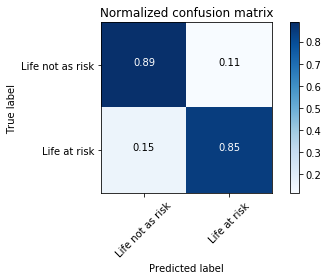

In [6]:
model_utils.modelValidation('clfRFC.joblib', features, labels)

# Validation for models trained with reduced dataset

### RandomForestClassifier

F-score on validation data: 0.7840
tn: 49170.000000, fp: 7421.000000, fn:2179.000000, tp: 11712.000000


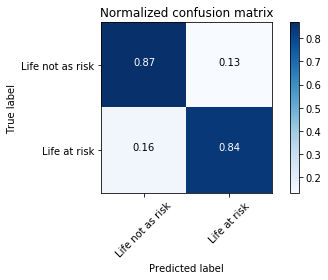

In [7]:
model_utils.modelValidation('rfClassifier_reduced.joblib', features, labels)

### AdaBoostClassifier

F-score on validation data: 0.7840
tn: 49170.000000, fp: 7421.000000, fn:2179.000000, tp: 11712.000000


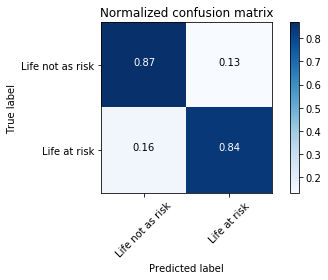

In [8]:
model_utils.modelValidation('adaClassifier_reduced.joblib', features, labels)

### Stacking with two best classifiers

F-score on validation data: 0.7267
tn: 53149.000000, fp: 3442.000000, fn:3856.000000, tp: 10035.000000


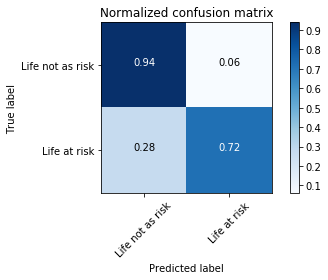

In [9]:
model_utils.modelValidation('sclfb_reduced.joblib', features, labels)

### Stacking with all classifiers

F-score on validation data: 0.7269
tn: 53179.000000, fp: 3412.000000, fn:3859.000000, tp: 10032.000000


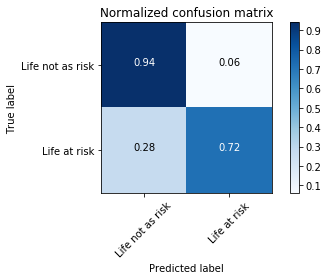

In [10]:
model_utils.modelValidation('sclf2_reduced.joblib', features, labels)

### RandomOverSampler

F-score on validation data: 0.7834
tn: 49054.000000, fp: 7537.000000, fn:2167.000000, tp: 11724.000000


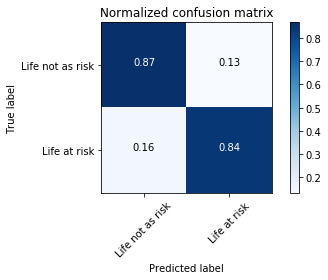

In [11]:
model_utils.modelValidation('clfRFC_reduced.joblib', features, labels)

In [50]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
X,y = shap.datasets.boston()
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)


# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
print(X.iloc[0,:])
print(type(np.asarray(rfValues)))
print(type(explainer.expected_value))
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

[23:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[23:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[23:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[23:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[23:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[23:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[23:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[23:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[23:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_

CRIM       0.00632  
ZN         18.00000 
INDUS      2.31000  
CHAS       0.00000  
NOX        0.53800  
RM         6.57500  
AGE        65.20000 
DIS        4.09000  
RAD        1.00000  
TAX        296.00000
PTRATIO    15.30000 
B          396.90000
LSTAT      4.98000  
Name: 0, dtype: float64
<type 'numpy.ndarray'>
<type 'numpy.float32'>
